<a href="https://colab.research.google.com/github/azizdafi/Bike-Sharing-Prediction/blob/main/Bike_sharing_demand_Prediction_Sayed_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

[link to Github](https://github.com/azizdafi/Bike-Sharing-Prediction)

# **Problem Statement**


The problem statement for this project is to develop a machine learning model that can accurately predict the number of rental bikes required at each hour in urban cities. This is crucial for ensuring a stable supply of rental bikes and minimizing waiting times for users. The project aims to address the challenge of making rental bikes available and accessible to the public at the right time by predicting the demand for rental bikes at different times of the day. The ultimate goal is to help cities optimize their bike-sharing systems by predicting demand and allocating resources accordingly.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [268]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
import missingno as msno
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [269]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


# reading data file 
dir_path = '/content/drive/MyDrive/Colab Notebooks/cap stone/Bike Prediction/'
file_name = 'SeoulBikeData.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path, encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [270]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [271]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [272]:
# Dataset Rows & Columns count
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 8760 rows and 14 columns


### Dataset Information

In [273]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We see that Date, Season, Holiday and functoning day are of object type, so these need to be updated as suited for ML.

#### Duplicate Values

In [274]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(dup)

0


#### Missing Values/Null Values

In [275]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

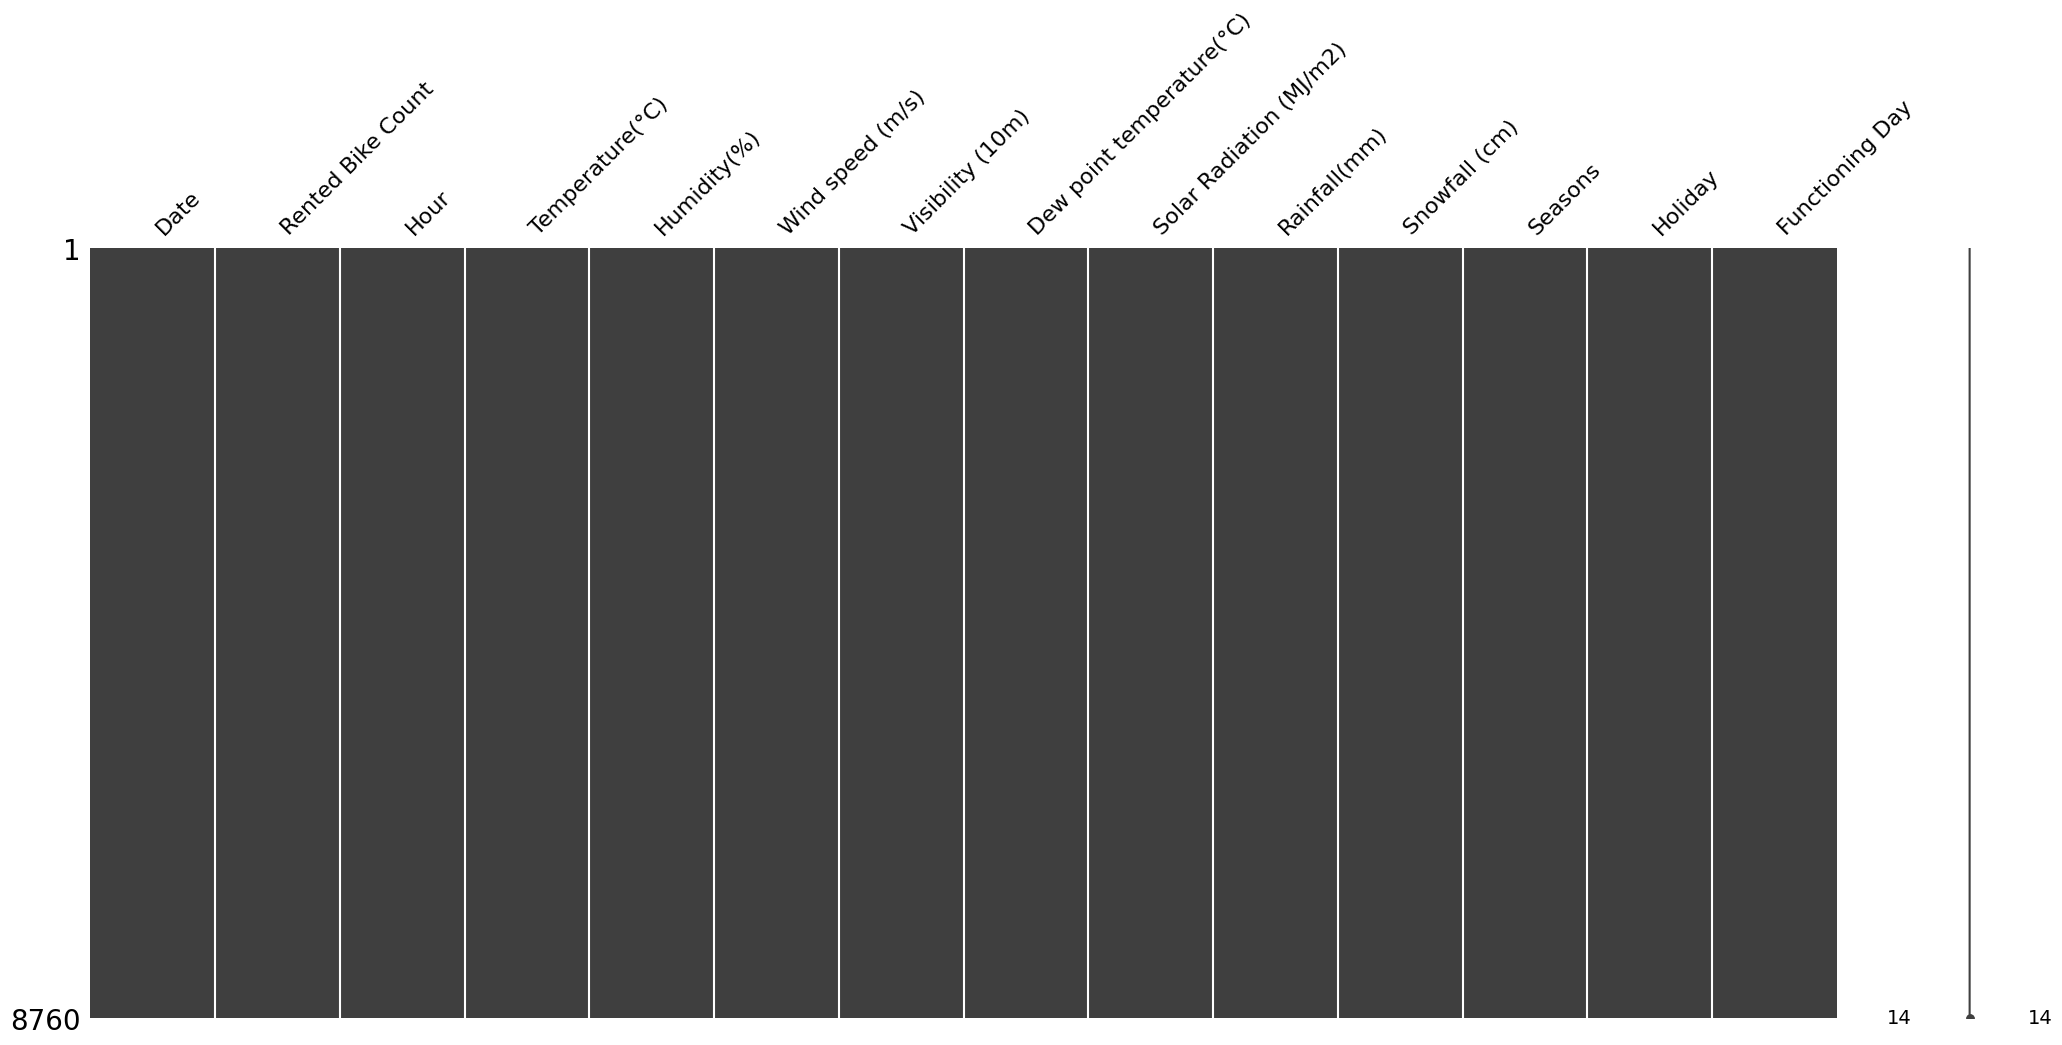

In [276]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

## ***2. Understanding Your Variables***

In [277]:
# Dataset Columns
col = df.columns
print(col)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [278]:
# Dataset Describe
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

### Check Unique Values for each variable.

In [279]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of variables in {column} column are: {res}")
  if res<25:
    x = df[column].unique()
    print('the values are: ', x )
    print('-'*30)


The number of variables in Date column are: 365
The number of variables in Rented Bike Count column are: 2166
The number of variables in Hour column are: 24
the values are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
------------------------------
The number of variables in Temperature(°C) column are: 546
The number of variables in Humidity(%) column are: 90
The number of variables in Wind speed (m/s) column are: 65
The number of variables in Visibility (10m) column are: 1789
The number of variables in Dew point temperature(°C) column are: 556
The number of variables in Solar Radiation (MJ/m2) column are: 345
The number of variables in Rainfall(mm) column are: 61
The number of variables in Snowfall (cm) column are: 51
The number of variables in Seasons column are: 4
the values are:  ['Winter' 'Spring' 'Summer' 'Autumn']
------------------------------
The number of variables in Holiday column are: 2
the values are:  ['No Holiday' 'Holiday']
---------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [280]:
# Write your code to make your dataset analysis ready.
df['Date']=pd.to_datetime(df['Date']) #converting the Date column to date time format

# creating new colums with respect to their features for future use
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# since all the required column information is in place, dropping the date column
df.drop(columns=['Date'],axis='columns',inplace=True)

In [281]:
# we found most of the colimns are attached with their units, omitting them and setting data colums as per our understanding and human understandable
df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'Wind Speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew Point Temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       }, inplace = True)

### What all manipulations have you done and insights you found?

We found there were no missing values

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [282]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


#### Chart - 1

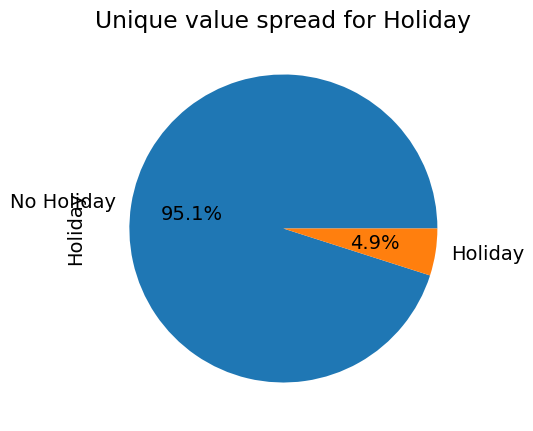

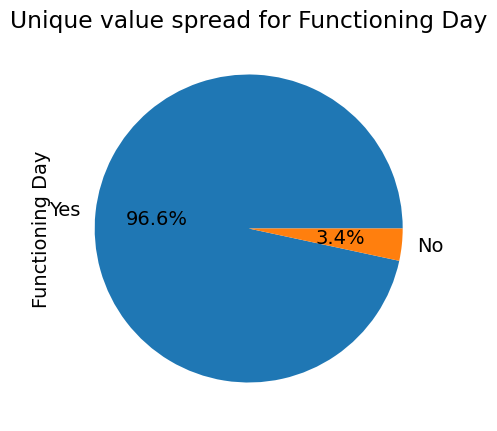

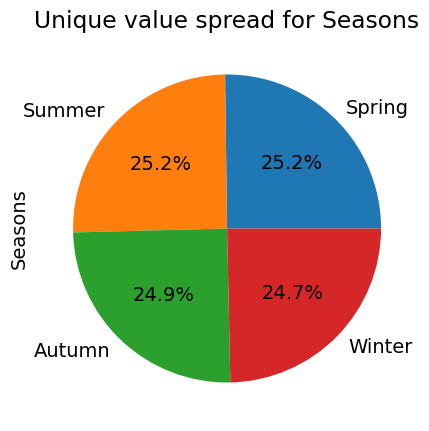

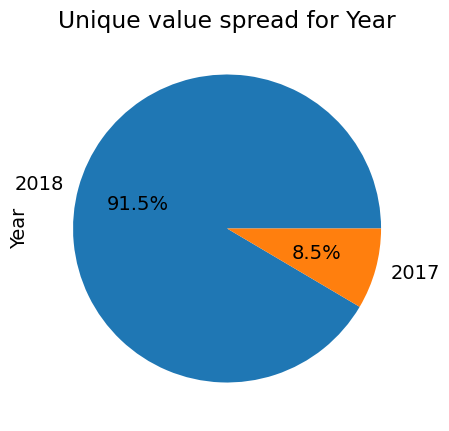

In [283]:
# Chart - 1 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), and Seasons(4), we are plotting pie plot to understand their share in the dataframe
# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]
# looping for every element in the list
for elements in x:
  spread = df[elements].value_counts()
  # pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
  spread.plot(kind = 'pie', autopct='%1.1f%%', pctdistance=0.6)
  #setting colum chart title
  plt.title(f'Unique value spread for {elements}')
  plt.show()



##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

1. Its is observed that 95% of days are working(not holiday) and 4.9% of days are holidays in the data given.
2. 96.6 % of values are recorded as functioning day where are the remaining are non functioning day
3. the data recorded in various season are almost equal (near to 25%)
4. the data has records of year 2017 and 2018 where most of the data belongs to 2018(91.5%) where as for 2017 its 8.5%.
5. the start date is 2017-01-12 and last date is 2018-12-11
the following code was used to extract information on point 5 before droping the date column
>```
min_date= df['Date'].min()
max_date = df['Date'].max()
print(f'the start date is {min_date} and last date is {max_date}')
>```



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is understood that mostly the days are functional or not holiday.

the data is captured for all the season, analysis can be more strong as data for all seasons is captured including functioning day and holidays.

the captured data falls under the range start date = 2017-01-12 and last date = 2018-12-11

#### Chart - 2

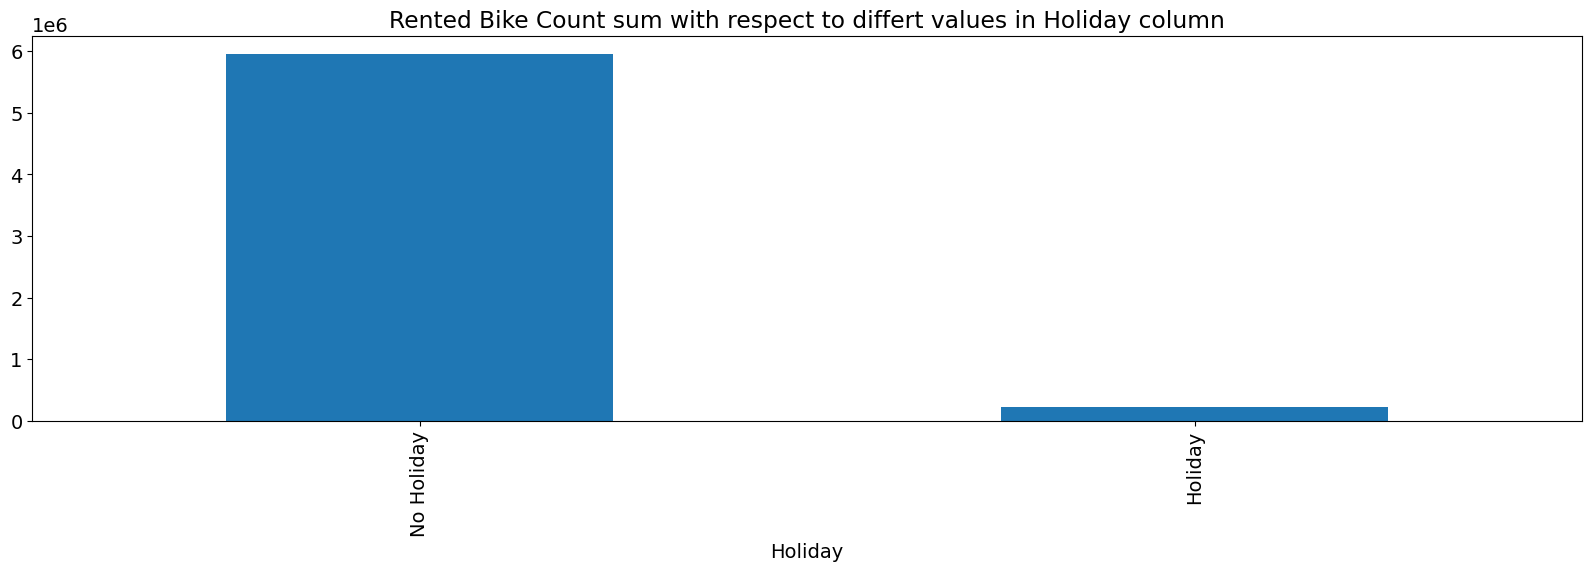

Holiday
No Holiday    5956419
Holiday        215895
Name: Rented Bike Count, dtype: int64


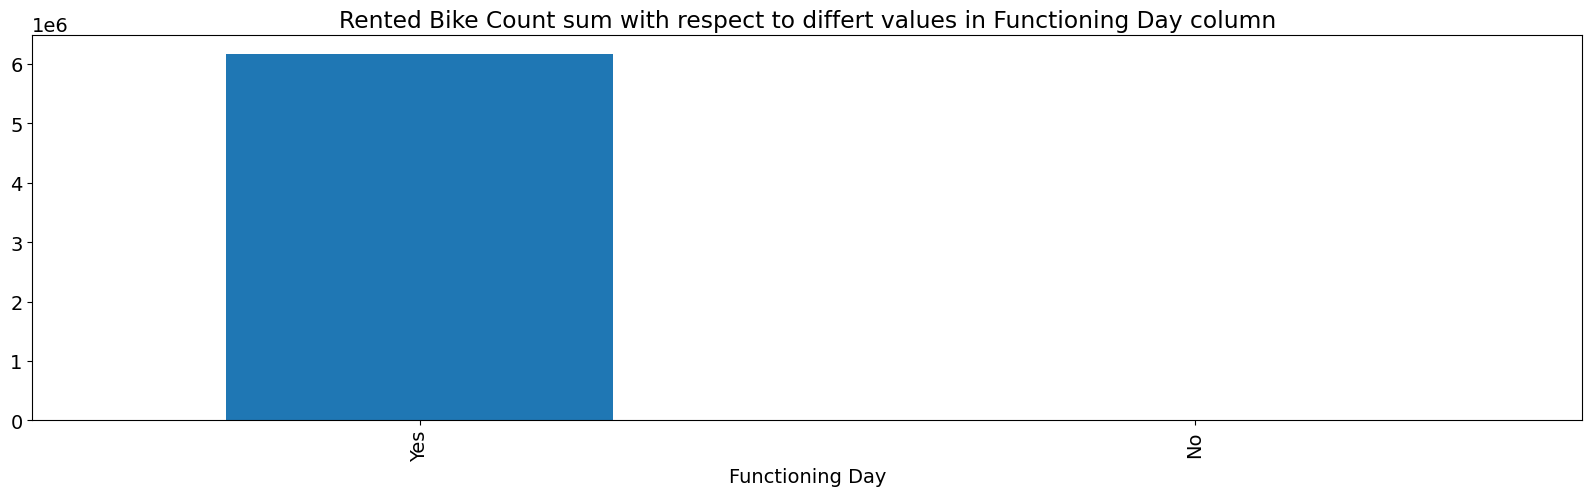

Functioning Day
Yes    6172314
No           0
Name: Rented Bike Count, dtype: int64


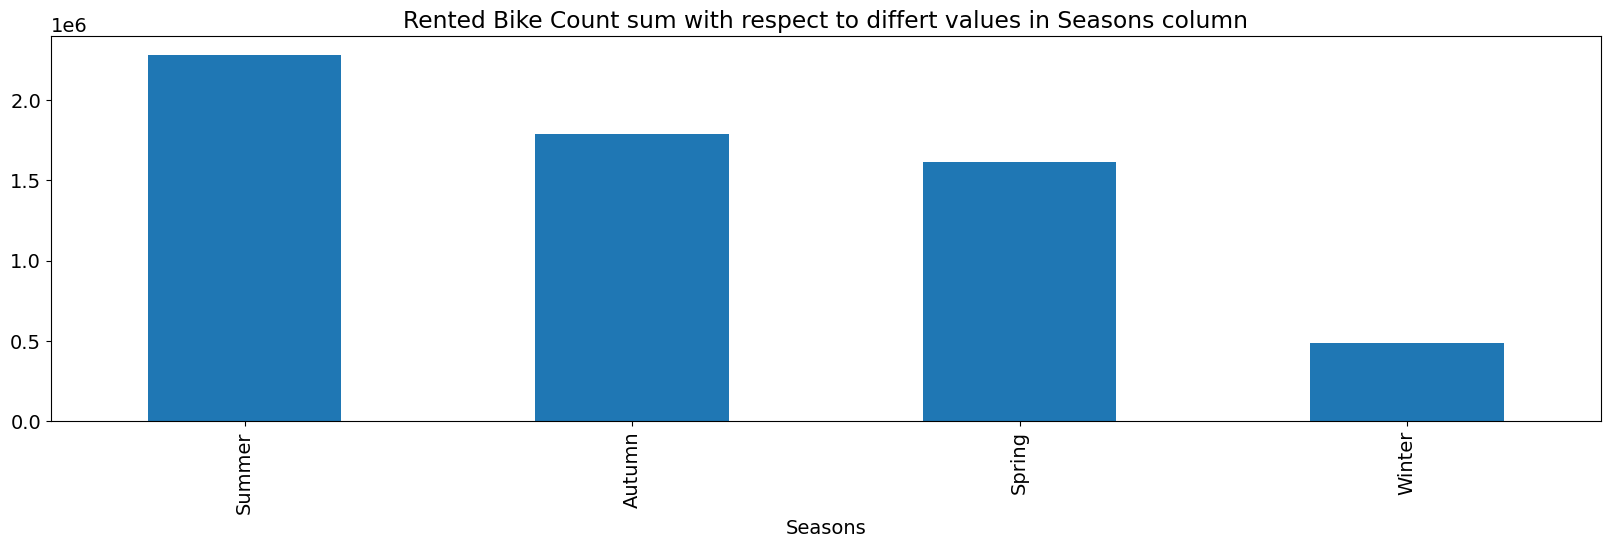

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64


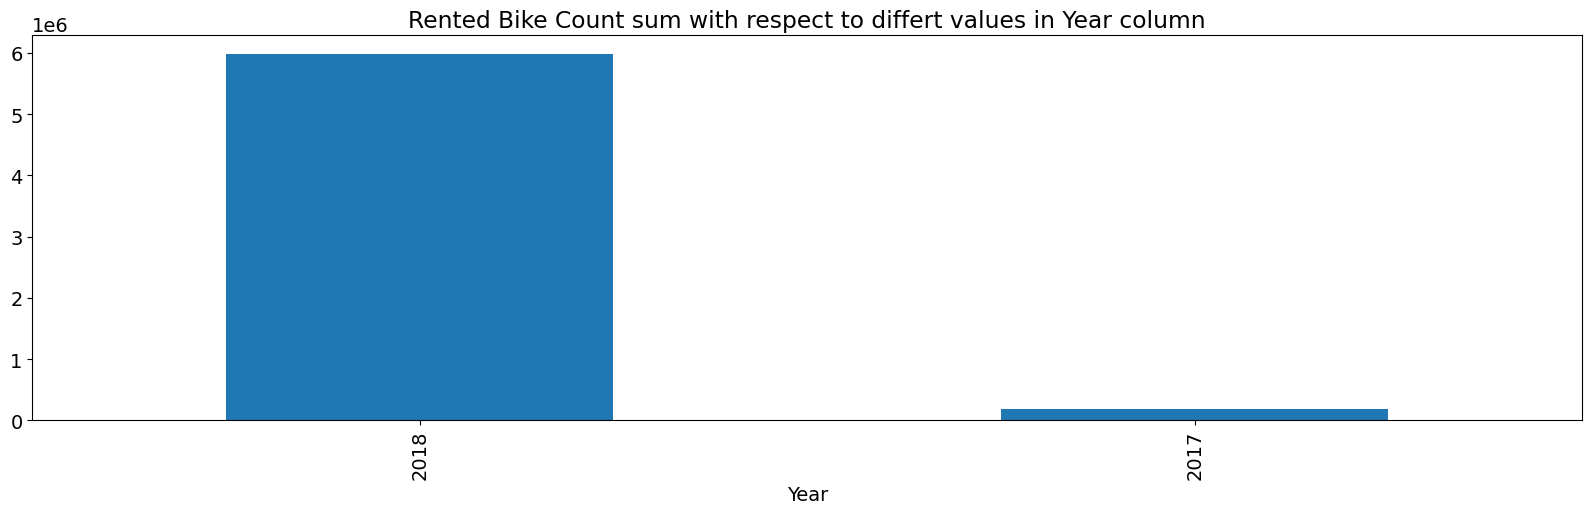

Year
2018    5986984
2017     185330
Name: Rented Bike Count, dtype: int64


In [284]:
# Chart - 2 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), Seasons(4), and Year(2)
# we are plotting bar plot to understand total rented bikes sum with respect to each category
import plotly.express as px
# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]

# looping for every element in the list
for elements in x:
  rented_bike_sum = df.groupby(elements)['Rented Bike Count'].sum().sort_values(ascending = False)

  # plotting bar plot
  rented_bike_sum.plot.bar()

  #setting colum chart title to infer about the chart
  plt.title(f'Rented Bike Count sum with respect to differt values in {elements} column')
  plt.show()
  # printing values obtained for reference
  print(rented_bike_sum)





##### 1. Why did you pick the specific chart?

bar charts show the sum beautifully and helps us interpret in a better way.

##### 2. What is/are the insight(s) found from the chart?

1. the sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895
2. The sume of bikes rented on Functioning Day is 6172314 and on a non functioning day is 0
3. the following are the sum of bike rented with respect to various seasons
>```
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
>```
>it is found that in winter the bikes are rented less comparitivly and heighest in Summer
4. The total bikes rented in 2018 is 5986984 and in 2017 is 185330


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.
2. During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented.

#### Chart - 3

<Axes: xlabel='Year,Month'>

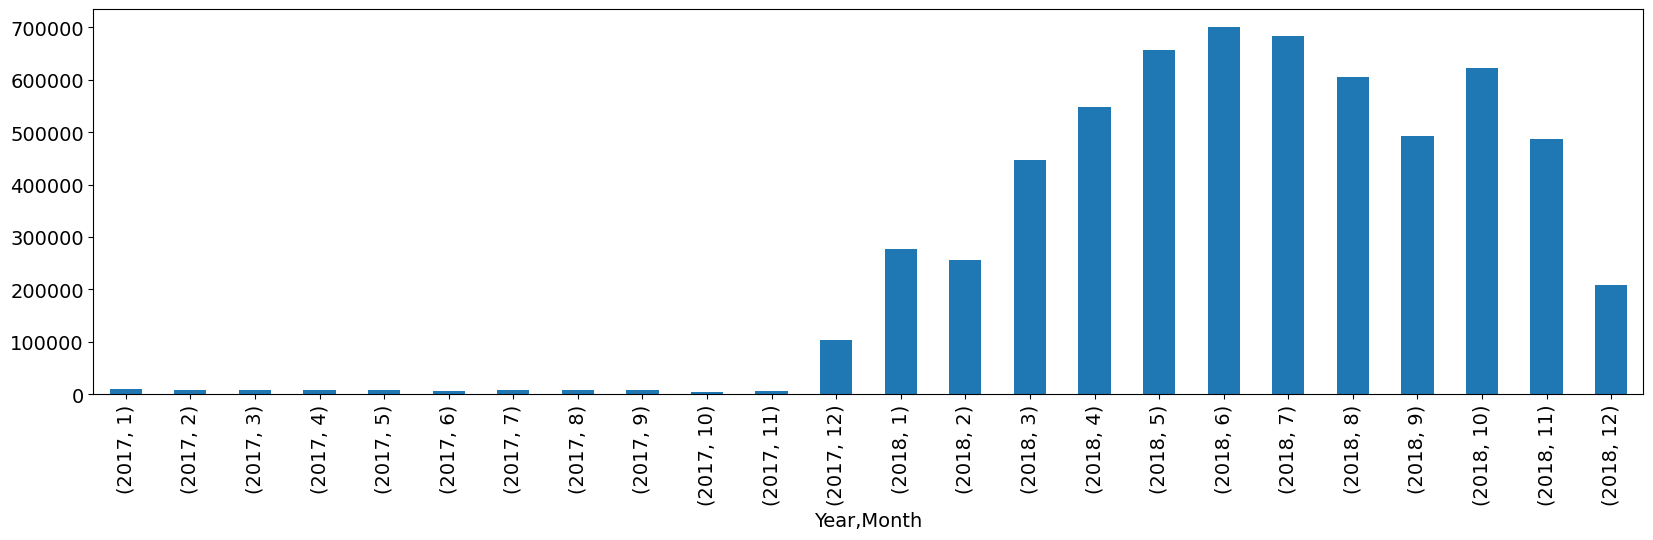

In [285]:
# Chart - 3 visualization code
# as observed in chart 2 with various seasons the bike rented are varing extreemly, sol plotting with a bar chart to understand with respect to various months
# of the business year
group_by_year_month = df.groupby(['Year', 'Month'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
group_by_year_month.plot.bar()

##### 1. Why did you pick the specific chart?

A verticle bar represents the total in a better way

##### 2. What is/are the insight(s) found from the chart?

It is observed that the first 11 months the compay had less rented bikes while the bike rentals started to spike from december 2017, though it was not that great however the growth seems to look significant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

after sustaining the market for 11 moths the company started to grow its sales.

#### Chart - 4

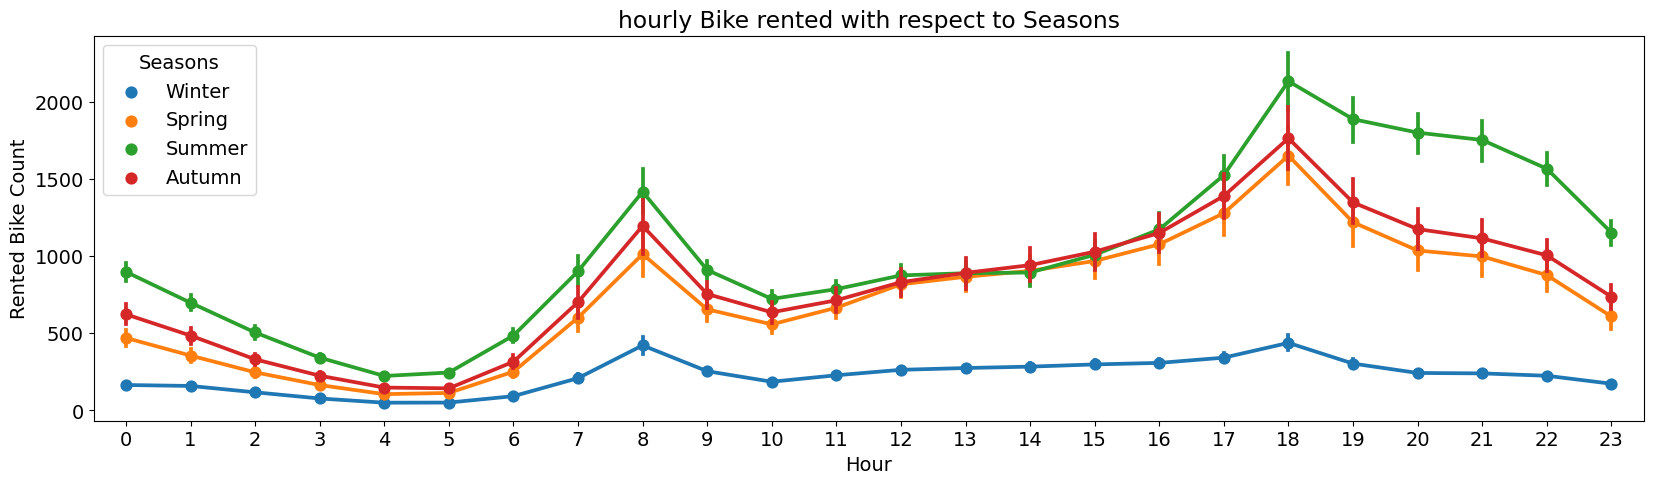

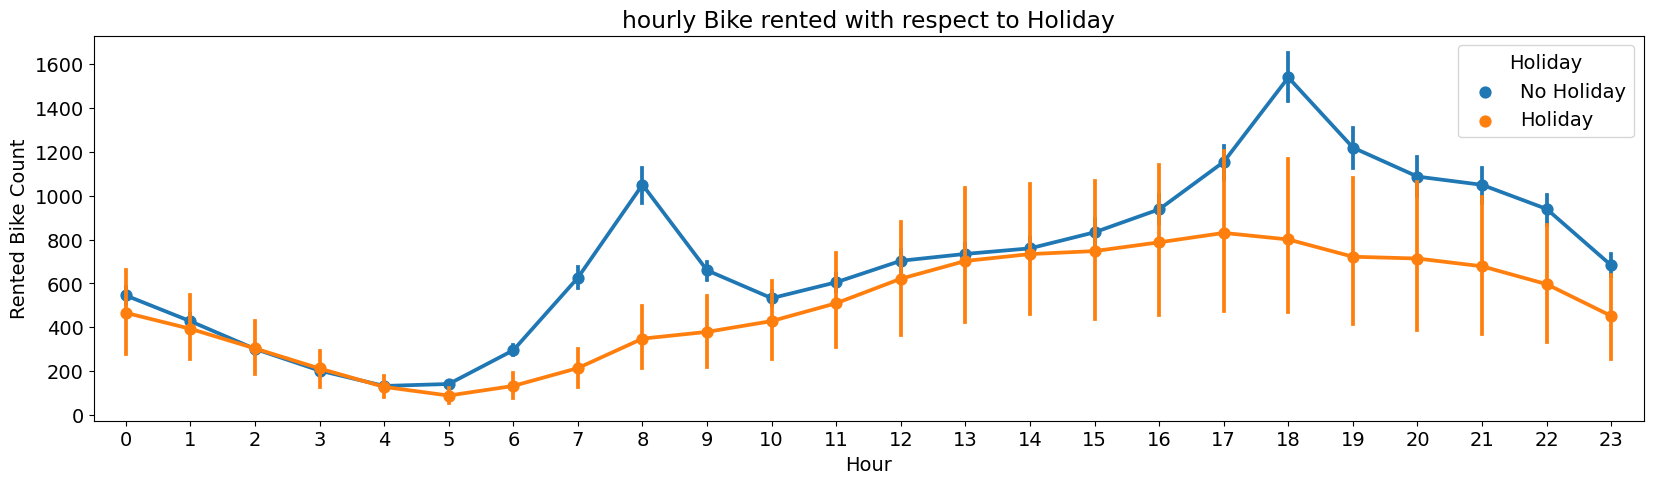

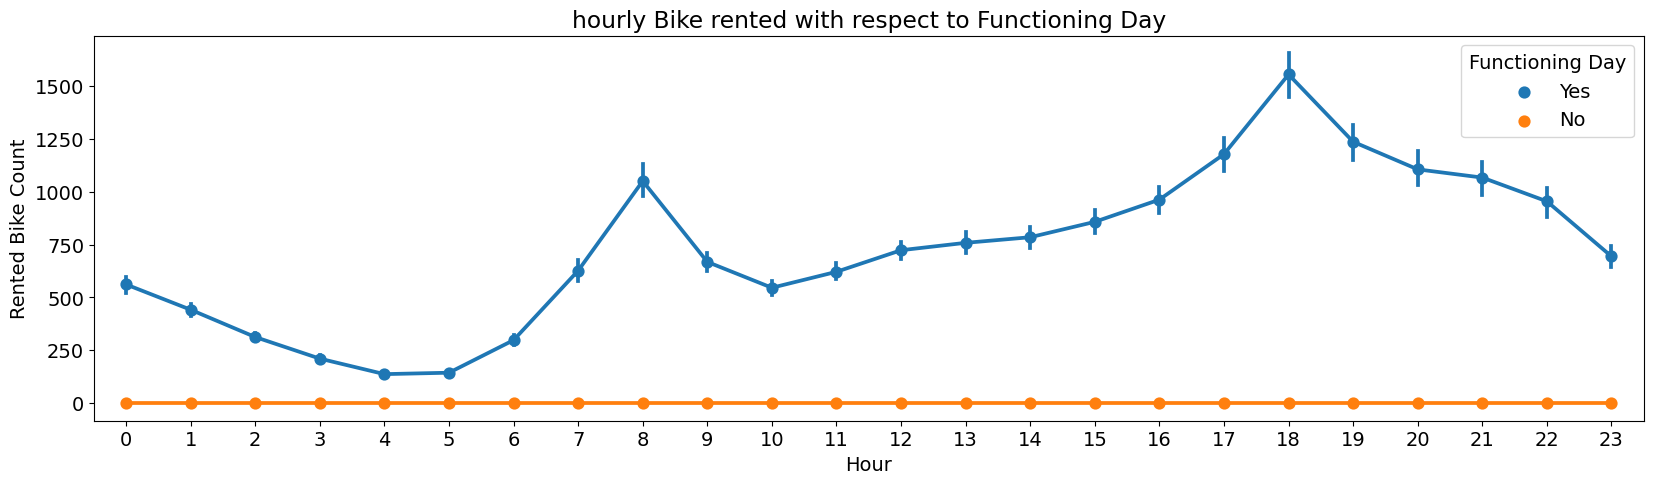

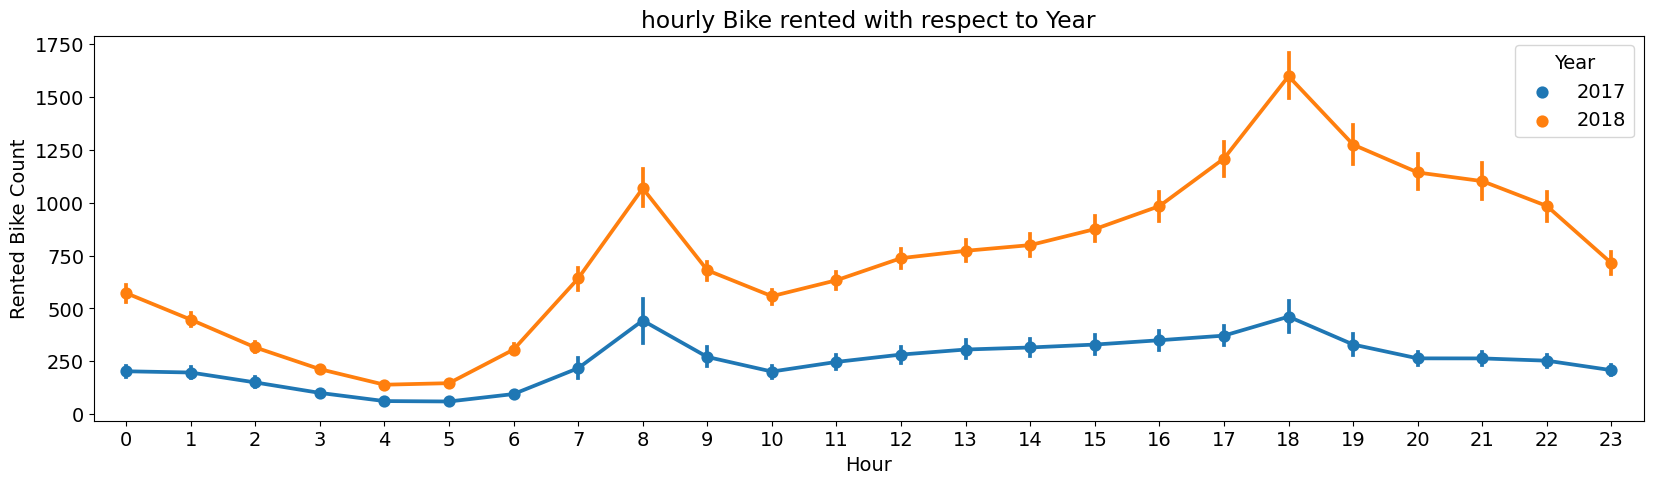

In [333]:
# Chart - 4 visualization code
# Exploring the Bike rentals with respect to Seasons, Holiday, and year
Parameters = ['Seasons', 'Holiday', 'Functioning Day', 'Year']
#looping through all the parameters chosen
for ele in Parameters:
  plt.title(f'hourly Bike rented with respect to {ele}')
  sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=ele)
  plt.show()

##### 1. Why did you pick the specific chart?

Sinc the data ranges from 0 to 23 as number of hours, a line chart can represent the data very well.

##### 2. What is/are the insight(s) found from the chart?

it is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [288]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [289]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [290]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [291]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [292]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [293]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [294]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [295]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [296]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [297]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [298]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [299]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [300]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [301]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [302]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [303]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [304]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [305]:
# Expand Contraction

#### 2. Lower Casing

In [306]:
# Lower Casing

#### 3. Removing Punctuations

In [307]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [308]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [309]:
# Remove Stopwords

In [310]:
# Remove White spaces

#### 6. Rephrase Text

In [311]:
# Rephrase Text

#### 7. Tokenization

In [312]:
# Tokenization

#### 8. Text Normalization

In [313]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [314]:
# POS Taging

#### 10. Text Vectorization

In [315]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [316]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [317]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [318]:
# Transform Your data

### 6. Data Scaling

In [319]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [320]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [321]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [322]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [323]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [324]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [325]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [326]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [327]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [328]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [329]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [330]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [331]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [332]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***